In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from PIL import Image
import cv2
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.ndimage import convolve
from matplotlib import colors
from scipy import interpolate
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import CubicSpline
from scipy.interpolate import BSpline
from scipy.interpolate import make_interp_spline
from scipy.interpolate import make_lsq_spline
import os
from sklearn import preprocessing

In [69]:
error=0.0006
lower=485
upper=1200
Num=415
num=415
Frame=230
tt='reflect'
cmapt='hot'
plt.style.use('classic')
val=2
typ='cubic'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
alanum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
number=['0000','0100','0250','0500']
label=['A','B','C']
total=[alanum,albnum,numbers,numbers,numbers,sianum,sibnum]
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3050')
number.append('3100')
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
dfys={}
dfxs={}
dfnan={}
xzs=[0.296]
for x in xzs:
    yt=[]
    ytn=[]
    for k in ['AL-B','AL-A','AL-C','SiO2-A','SiO2-B','SiO2-C','SiC-A','SiC-B','SiC-C']:
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                try:
                    df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    for column in df.index:
                        if column>x-error and column<x+error:
                            y=df.loc[column].values[0]
                            #print(y)
                            ys.append(y)
                            yns.append(y)
                            break
                except Exception as e:
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    #yns.append(np.nan)
                    pass
            yt.append(ys)
            ytn.append(yns)
    dfys['EEL_Compoent_{}_Line_{}'.format(x,i)]=yt
    dfnan['EEL_Compoent_{}_Line_{}'.format(x,i)]=ytn
df3 = pd.DataFrame.from_dict(dfys, orient='index')
df2 = pd.DataFrame.from_dict(dfnan, orient='index')
df3.to_csv('EELxx_{}.csv'.format(x))
a,b=df3.shape
df2.to_csv('EELxx_{}.csv'.format(x))
df2.drop([2,8],axis=1,inplace=True)
stelement=['AlA','AlB','SiO2A','SiO2B','SiO2C','SiCA','SiCB']
z=0
whole={}
whole1={}
whole2={}

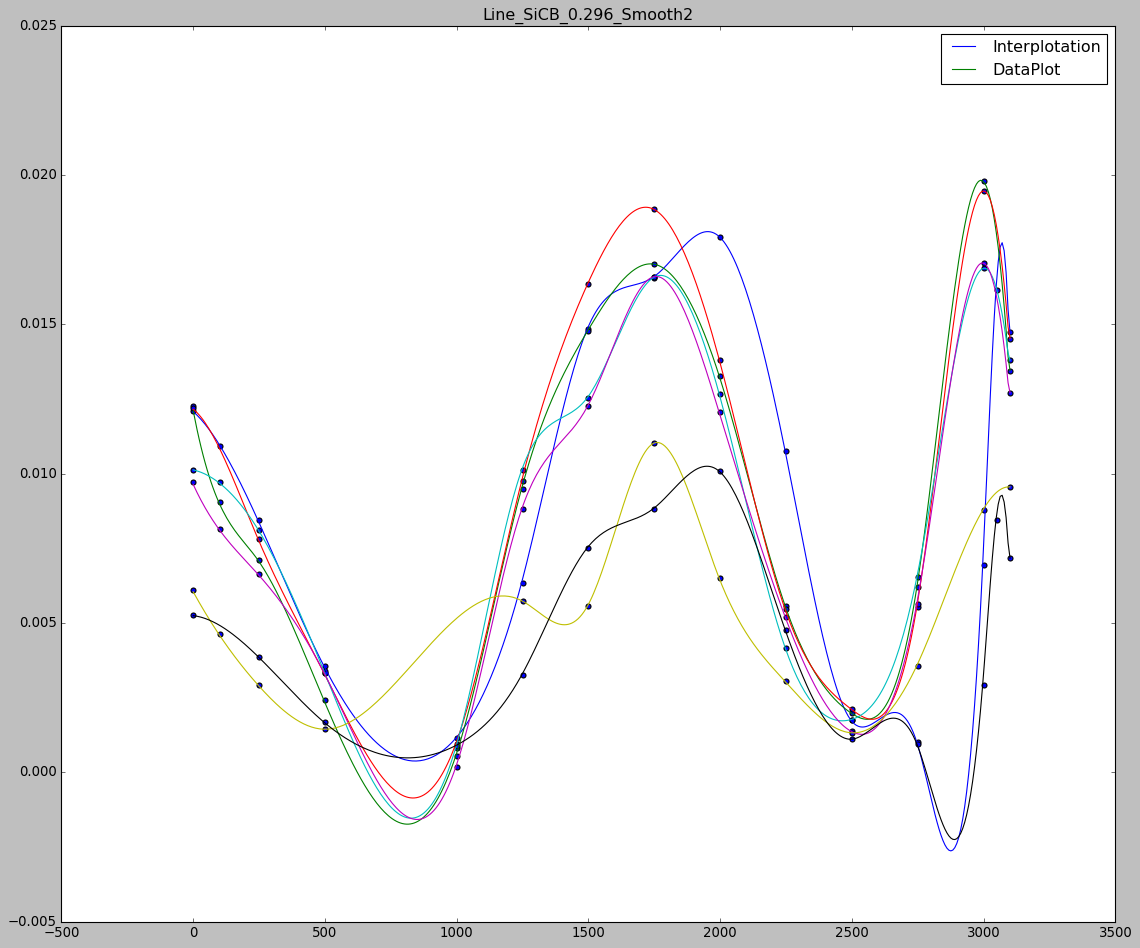

In [70]:
a,b=df2.shape
for row in range(0,a):
    co=0
    y=df2.iloc[row].values
    fig= plt.figure(figsize=(17,14))
    axes=fig.add_subplot(1,1,1)
    for value in y:
        #fig= plt.figure(figsize=(12,10))
        #axes=fig.add_subplot(1,1,1)
        mean=np.full(val,1/val)
        pos=total[co]
        co=co+1
        #display(len(value),len(pos),value)
        #f = Rbf(pos,value,kind=typ)
        f = interp1d(pos,value,kind=typ)
        #f = interpolate.interp1d(pos, value)
        #f=interpolate.Akima1DInterpolator(pos,value)
        #f=interpolate.CubicSpline(pos,value)
        #f=interpolate.BSpline(pos,value,1)
        #f=interpolate.make_interp_spline(pos,value)
        xnew=np.linspace(0,3100,num)
        plt.scatter(pos,value),plt.plot(xnew,convolve(f(xnew),mean,mode=tt))
        plt.legend(['Interplotation','DataPlot'])
        plt.title('Line_{}_{}_Smooth{}'.format(stelement[z],xzs[row],val))
        plt.savefig('Line_{}_{}_S{}.png'.format(stelement[z],xzs[row],val))
        #display(xzs[row],stelement[z])
        nosiy=convolve(f(xnew),mean,mode=tt)
        whole['EEL={}_line_{}'.format(xzs[row],stelement[z])]=value
        whole1['EEL={}_line_{}'.format(xzs[row],stelement[z])]=nosiy
        z+=1
        if z==len(stelement):
            z=0
finaldf =pd.DataFrame.from_dict(whole, orient='index')
#display(finaldf,whole)
finaldf1 =pd.DataFrame.from_dict(whole1, orient='index')
finaldf1.to_csv('First.csv')
finaldf2=DataFrame(whole2)
#finaldf1.to_csv('S{}.csv'.format(val))

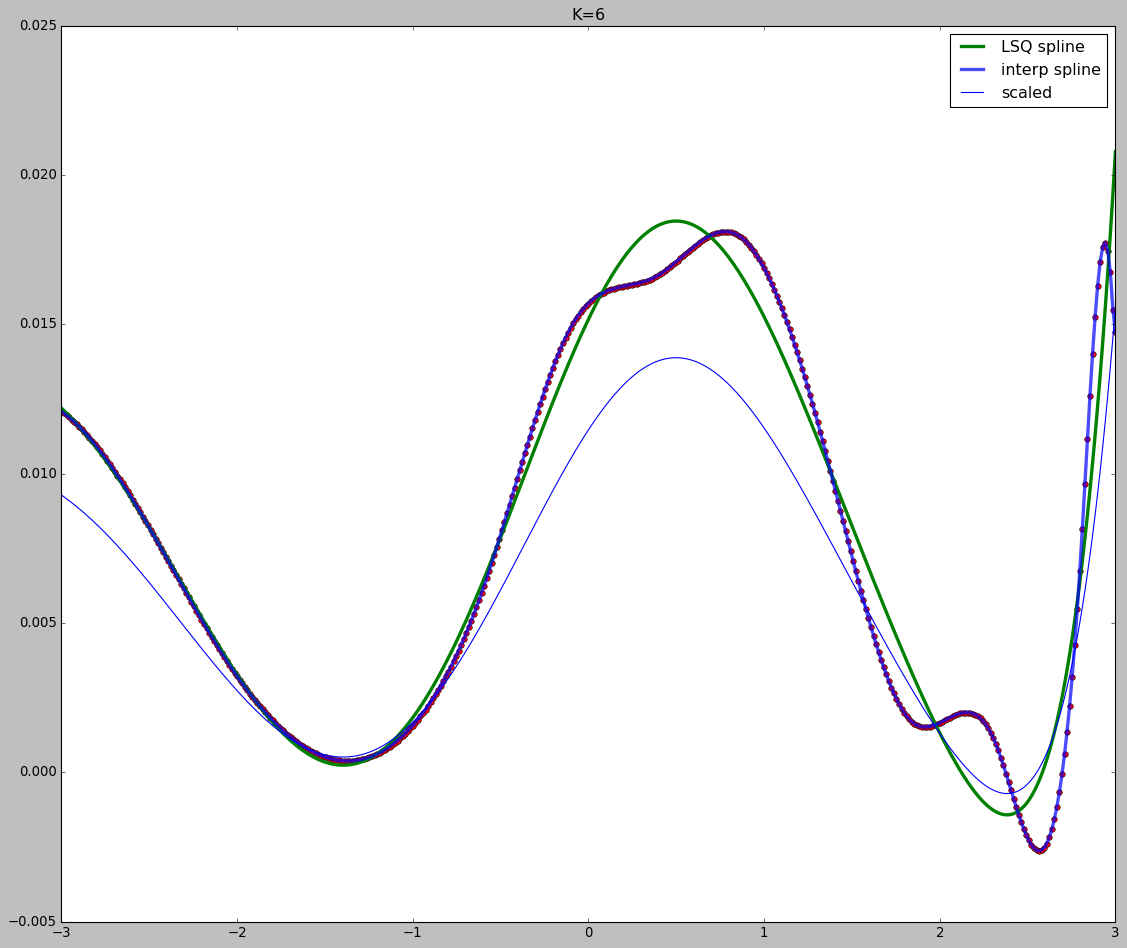

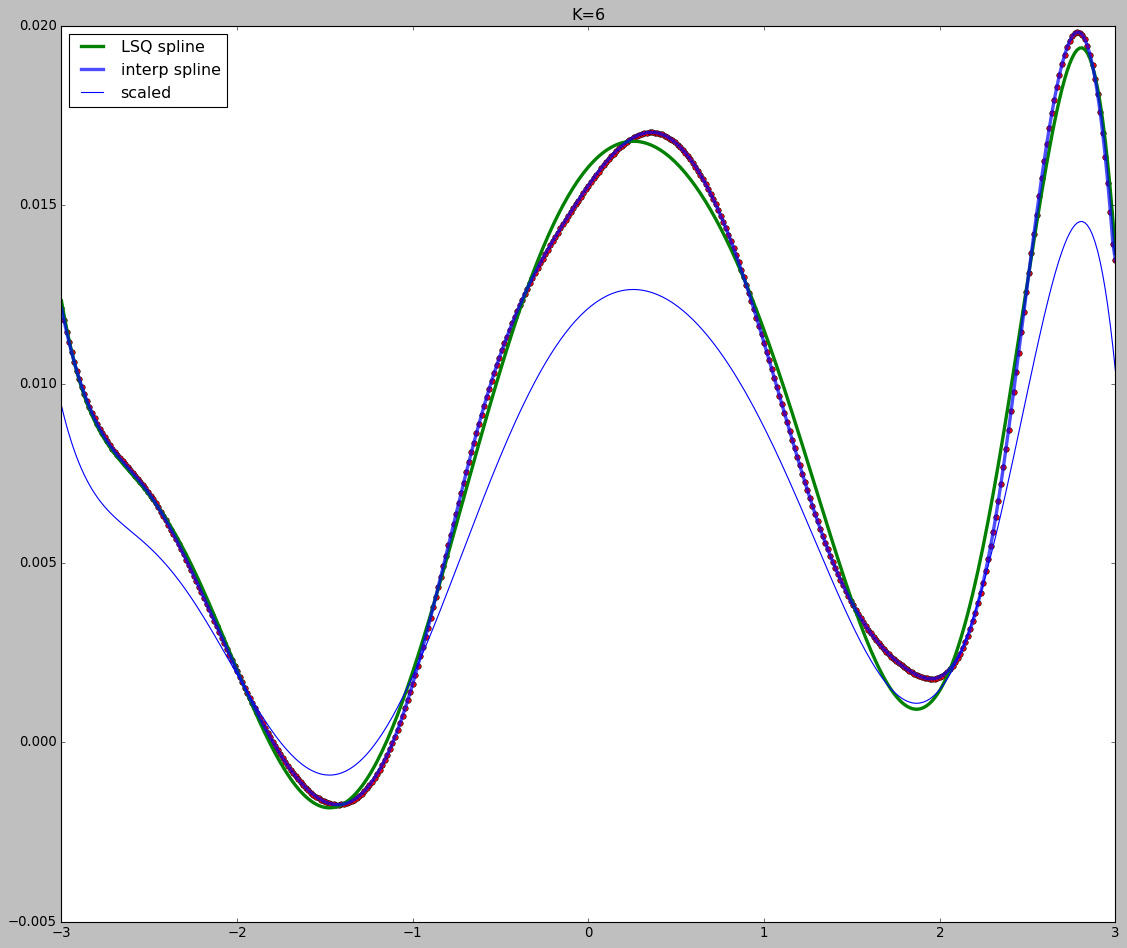

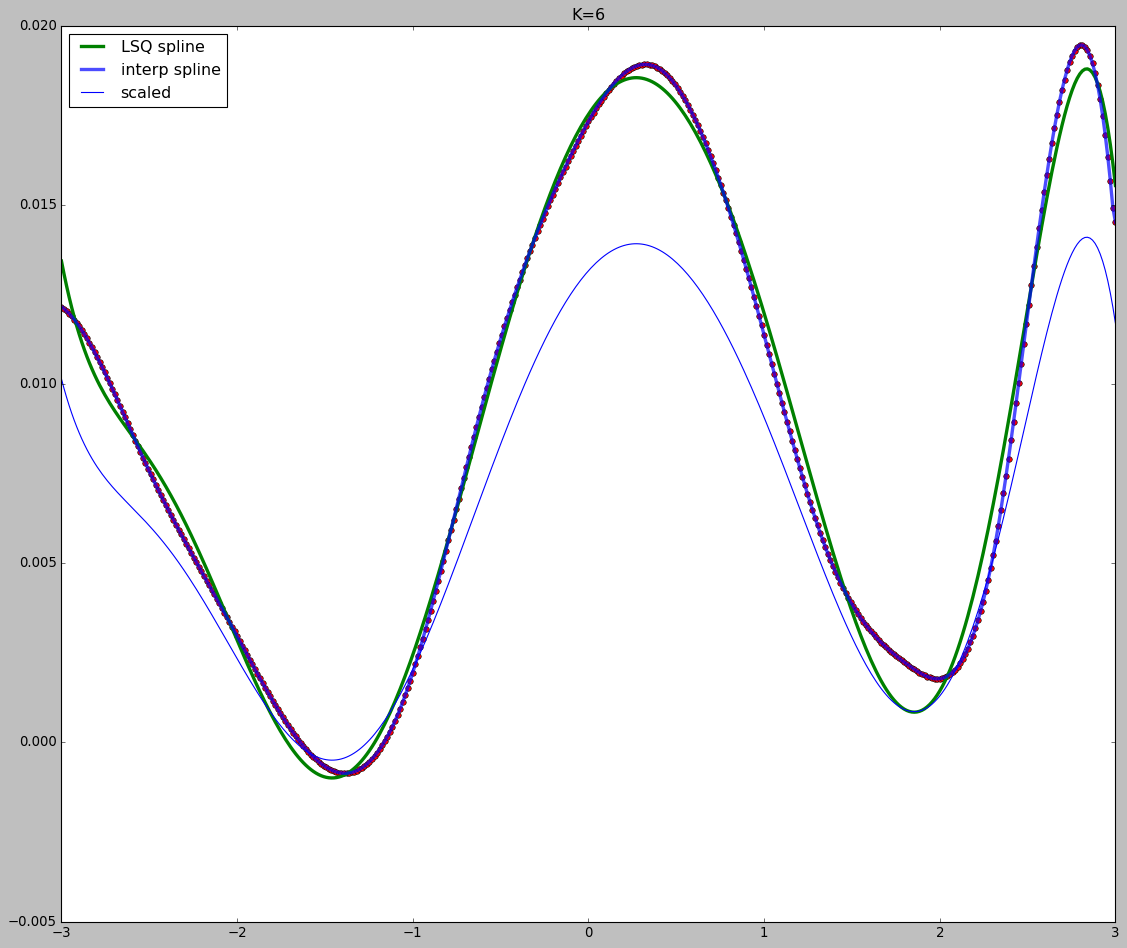

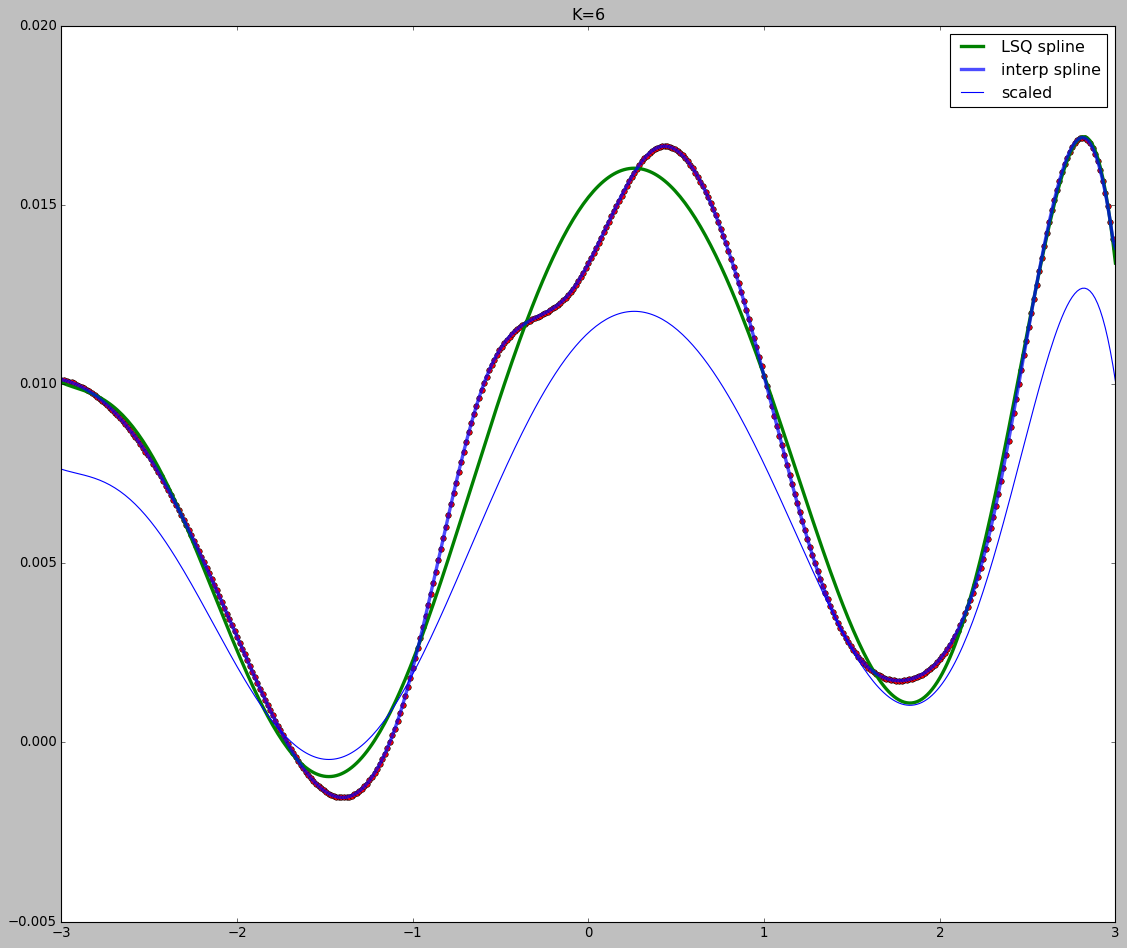

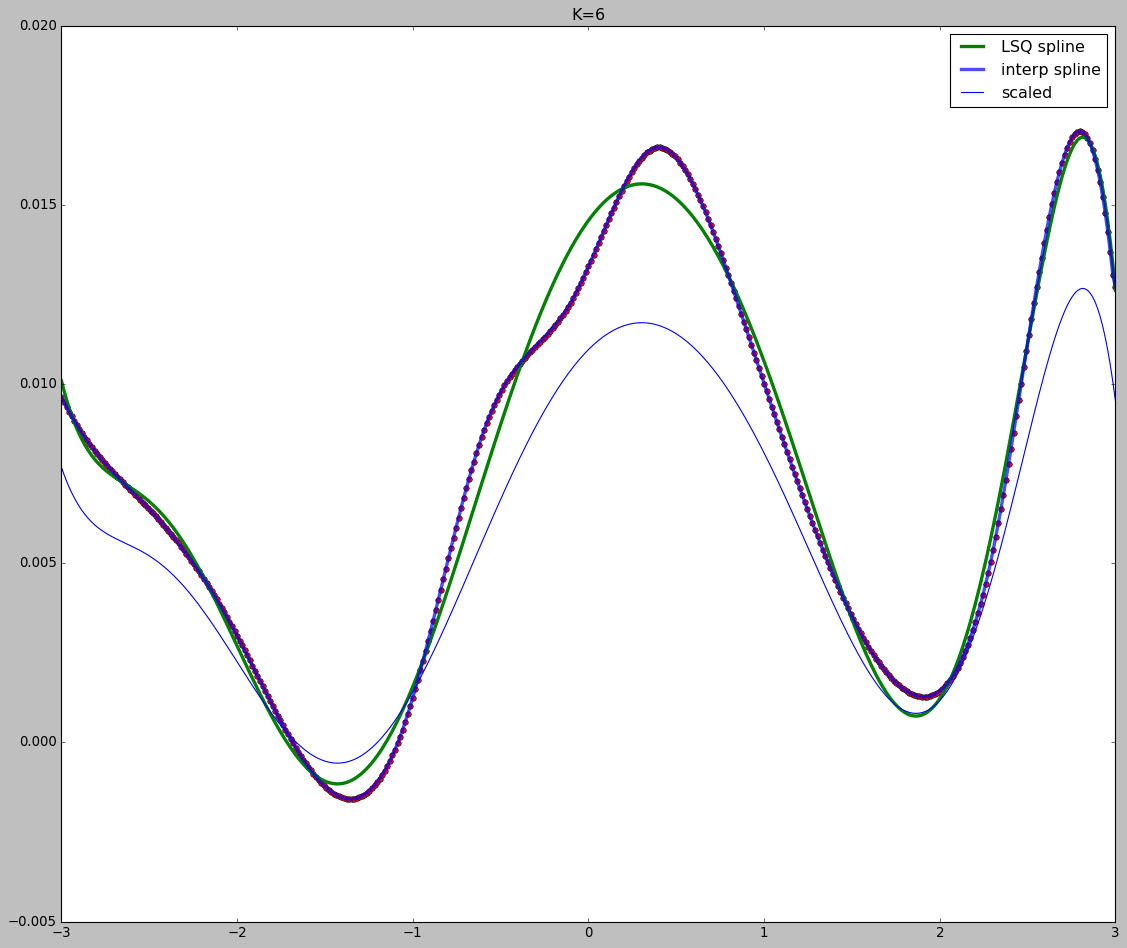

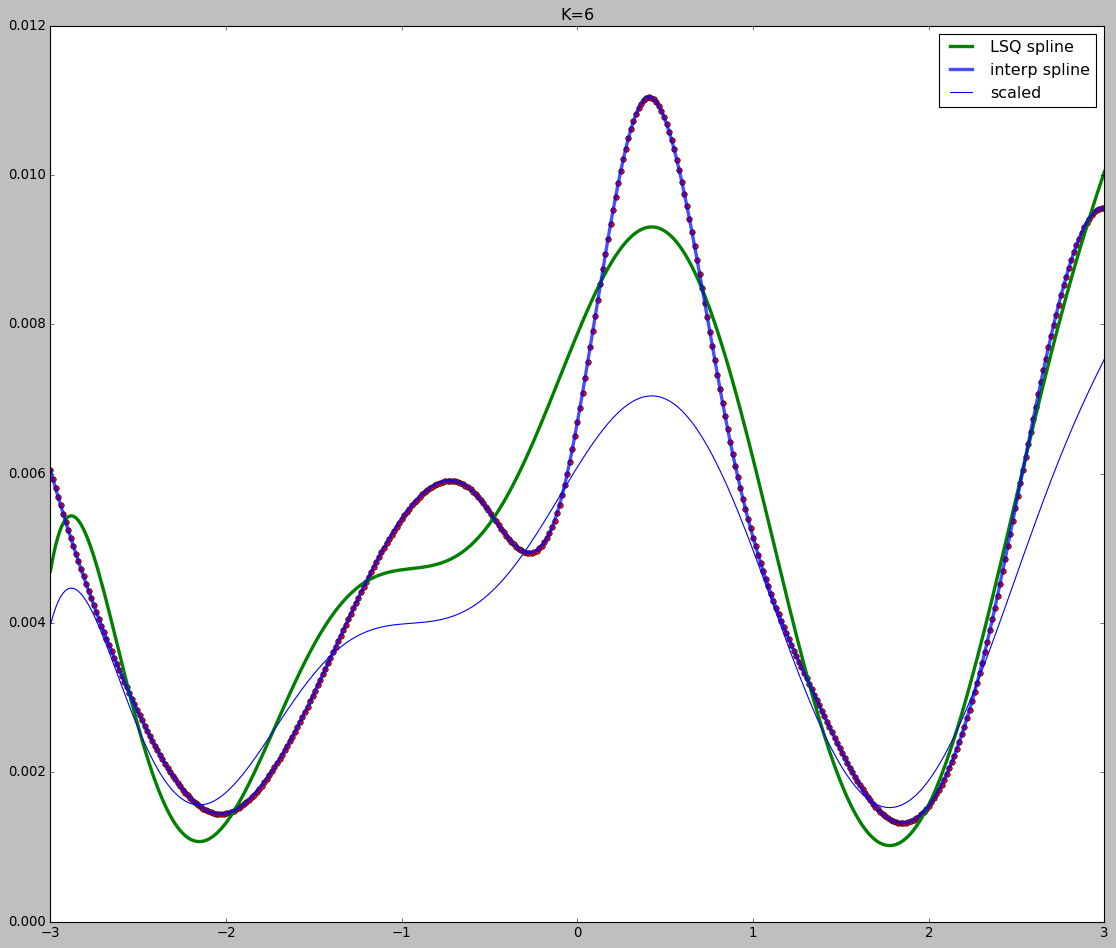

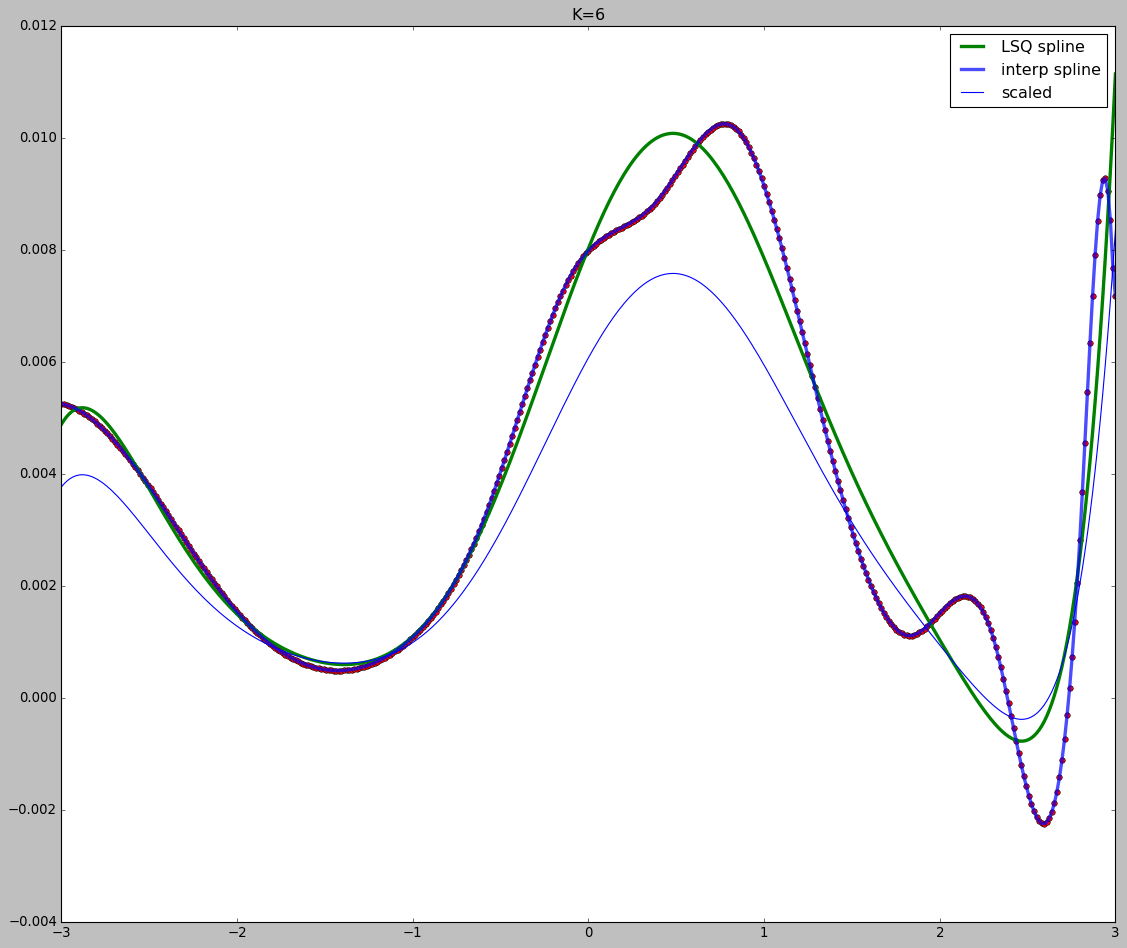

In [71]:
a,b=finaldf1.shape
#display(a,b)
FF={}
for i in range(1,a+1):
    V=df3
    newa=[]
    fig= plt.figure(figsize=(17,14))
    axes=fig.add_subplot(1,1,1)
    y=finaldf1.iloc[i-1:i].values[0]
    X = np.linspace(-3,3, len(y))
    from scipy.interpolate import make_lsq_spline, BSpline
    t = [-1, 0, 1]
    k = 6
    t = np.r_[(X[0],)*(k+1),t,(X[-1],)*(k+1)]
    spl = make_lsq_spline(X, y, t, k)
    from scipy.interpolate import make_interp_spline
    spl_i = make_interp_spline(X, y)
    xs = np.linspace(-3, 3, num)
    Xsca=spl(xs)
    xsca=Xsca.reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler((min(xsca)+abs(min(xsca)*0.5),max(xsca)*0.75))
    x_scaled = min_max_scaler.fit_transform(xsca)
    import matplotlib.pyplot as plt
    plt.plot(X, y, 'ro', ms=5)
    plt.plot(xs, spl(xs), 'g-', lw=3, label='LSQ spline')
    plt.plot(xs, spl_i(xs), 'b-', lw=3, alpha=0.7, label='interp spline')
    plt.plot(xs,x_scaled,label='scaled')
    plt.legend(loc='best')
    #display(spl(xs))
    FF['L_{}'.format(i)]=x_scaled.flatten()
    #display(len(spl(xs)))
    #plt.show()
    plt.title('K={}'.format(k))
    #plt.savefig('W{}.png'.format(i))
Finaldf1=DataFrame(FF).transpose()
#display(Finaldf1)

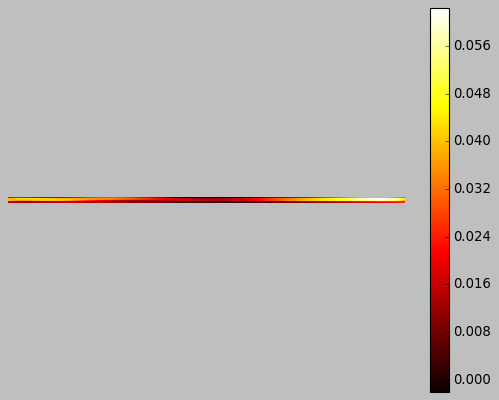

In [41]:
zz=Finaldf1
RR,CC = zz.shape
for jj in range(1,int(RR/7)+1):
    plt.imshow(zz.iloc[(jj-1*7):jj*7].values,cmap='hot')
    plt.axis('off')
    plt.colorbar()
    plt.savefig('FirstExpan{}.png'.format(jj),bbox_inches='tight',dpi=800)

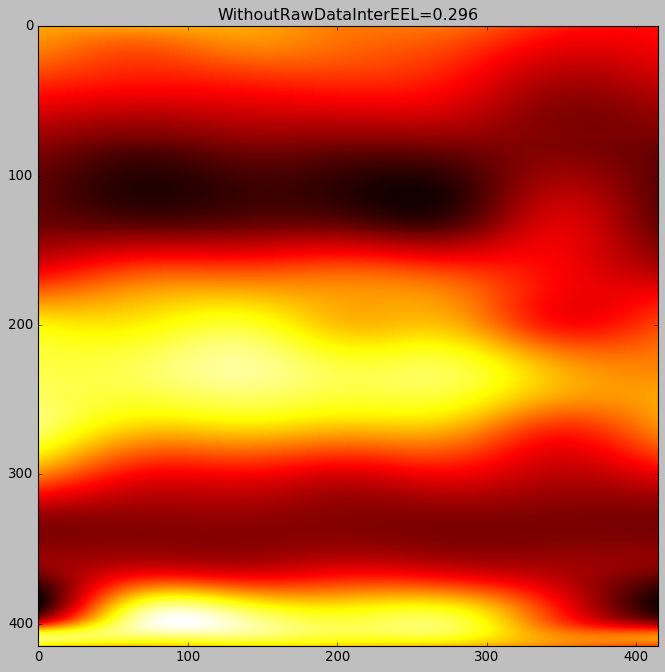

In [72]:
pos=np.linspace(0,7,7)
R,C=finaldf1.shape
#display(finaldf1)
angle=127
for j in range(1,round(R/7)+1):
    subnew1={}
    '''fig= plt.figure(figsize=(12,10))
    axes=fig.add_subplot(1,1,1)'''
    for i in range(1,C+1):
        qq=finaldf1.iloc[(j-1)*7:j*7,i-1:i].values
        #display(finaldf.iloc[:,i-1:i][:7])
        #plt.scatter(pos,qq)
        #display(len(pos),len(qq))
        F = Rbf(pos,qq,kind=typ)
        #F=interpolate.PchipInterpolator(pos,qq)
        xnew=np.linspace(0,7,Num)
        XX=F(xnew).reshape(-1,1)
        min_max_scaler = preprocessing.MinMaxScaler((min(XX)+abs(min(XX)*0.15),max(XX)*0.9))
        X_scaled = min_max_scaler.fit_transform(XX)
        subnew1['{}'.format(i)]=X_scaled.flatten()
        #subnew['{}'.format(i)]=RGB
        #print(convolve(F(xnew),mean,mode=tt))
    dff=DataFrame(subnew1)
    #dff.to_csv('After_A{}_EEL={}.csv'.format(typ,xzs[j-1]))
    #display(df,len(df.columns),len(df.index))
    dy=np.linspace(0,3100,Num)
    ''' three=plt.figure(figsize=(60,60)).gca(projection='3d')
    for ll in range(0,num):
        #display(len(dff.index),len(dff.iloc[11]))
        three.scatter(dff.index,dy,dff.iloc[ll], alpha=0.8)
        three.set_xlabel('Lines',fontsize=100)
        three.set_ylabel('Columns',fontsize=100)
        three.set_zlabel('Intensity',fontsize=100)
        three.set_zticks(np.linspace(0,0.06))'''
    '''three.plot_surface(dff.index,dy,dff.values,cmap='tab20c')
    three.set_xlabel('Lines',fontsize=100)
    three.set_ylabel('Columns',fontsize=100)
    three.set_zlabel('Intensity',fontsize=100)'''
    #plt.title('EEL={}_A{}_alog{}_S_{}'.format(xzs[j-1],angle,typ,val),fontsize=100)
    #three.view_init(elev=10, azim=angle)
    '''    %time r=dfr.values.tolist()
    %time im = np.array(r, dtype=np.uint8)
    %time plt.imshow(im)'''
    #plt.savefig('EEL={}_A{}_alog{}_S_{}.png'.format(xzs[j-1],angle,typ,val),bbox_inches='tight')
    #plt.axis('off')
    #%time plt.savefig('AASecEEL={}.png'.format(xzs[j-1]),bbox_inches='tight',dpi=800)
    #plt.plot(xnew,f(xnew))
    #df=DataFrame(new)
    #display(df)
    #dfr.to_csv('fter_A{}_EEL={}.csv'.format(typ,xzs[0]))
    fig= plt.figure(figsize=(10,18))
    dff.to_csv('After_A{}_EEL={}.csv'.format(typ,xzs[0]))
    yy=dff.index
    #img=plt.contourf(yy,dy,dff.transpose().values,cmap='hot')
    plt.imshow(dff.transpose().values,cmap='hot')
    #plt.axis('off')
    '''norm = colors.Normalize(vmin=-0.001, vmax=0.07)
    img.set_norm(norm)'''
    plt.title('WithoutRawDataInterEEL={}'.format(xzs[j-1]))
    '''plt.colorbar()
    norm = colors.Normalize(vmin=-0.0009, vmax=0.015)
    img.set_norm(norm)'''
    plt.savefig('WiExpan_{}.png'.format(j),bbox_inches='tight')

In [22]:
import cv2
import numpy as np
import glob
R,C=finaldf1.shape
img_array = []
font= cv2.FONT_HERSHEY_SIMPLEX 
for i in range(1,round(R/7)+1):
    for filename in glob.glob('Expan_{}.png'.format(i)):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)
out = cv2.VideoWriter('RC{}_T_{}_Frame{}.mp4'.format(Num,cmapt,Frame),cv2.VideoWriter_fourcc(*'DIVX'), 14, size)
display(len(img_array))
for j in range(len(img_array)):
    out.write(img_array[j])
out.release()

1

In [57]:
k=[]
l=[]
for i in range (1,dff.shape[0]+1):
    z=dff.iloc[i-1:i].values[0]
    k.append(max(z))
    l.append(min(z))
display(max(k),min(l))

0.01924028018922

-0.0022386043807993707

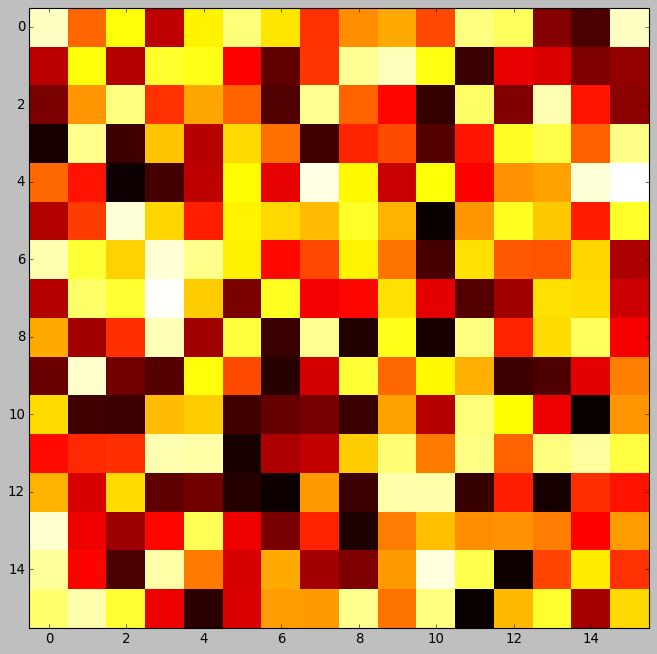

numpy.ndarray

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(10,30))
a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()
type(a)

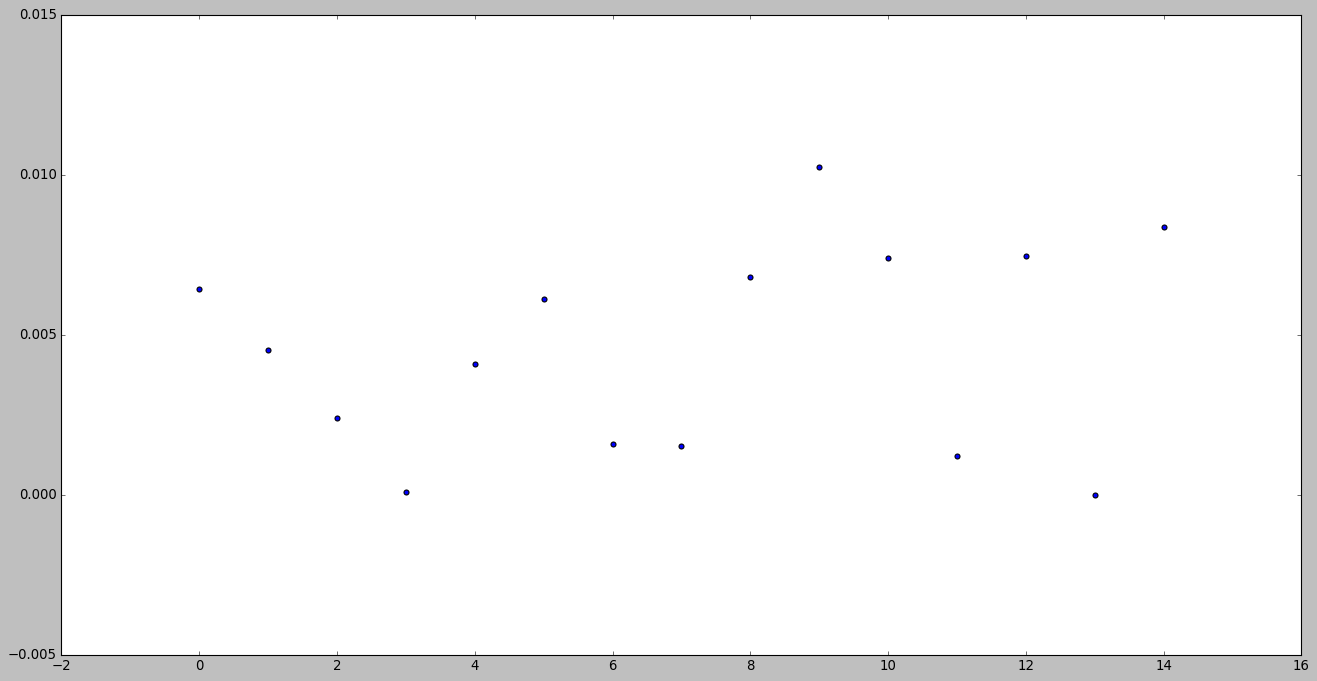

In [22]:
fig= plt.figure(figsize=(20,10))
x=np.arange(0,15,1)
y=[0.006431898,0.0045111,0.002403675,9.00E-05,0.004071884,0.00612637,0.001588339,0.001502513,0.006811032,0.010242329,0.007400558,0.001207927,0.007457289,0,0.008375273]
plt.scatter(x,y)

"df=DataFrame(new)\ndisplay(df)\ndf.to_csv('ghghg.csv')"

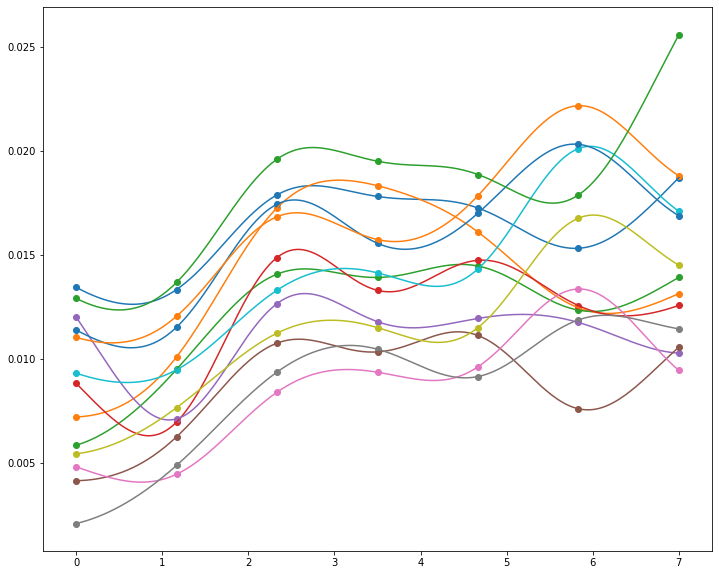

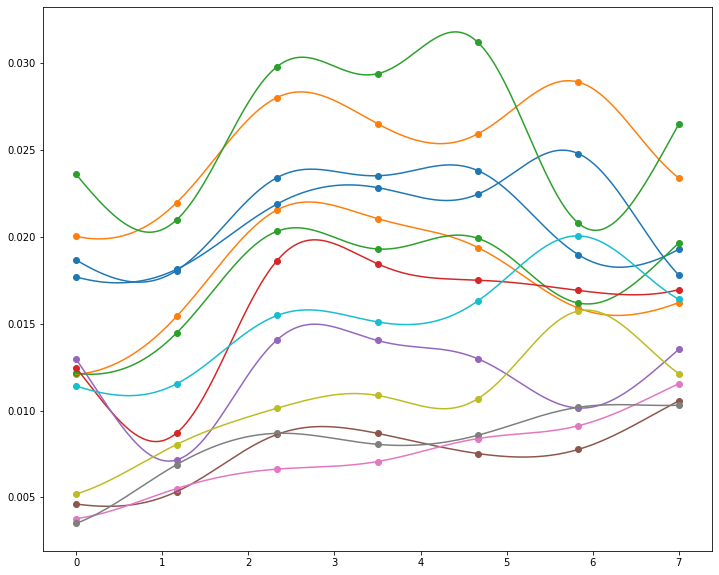

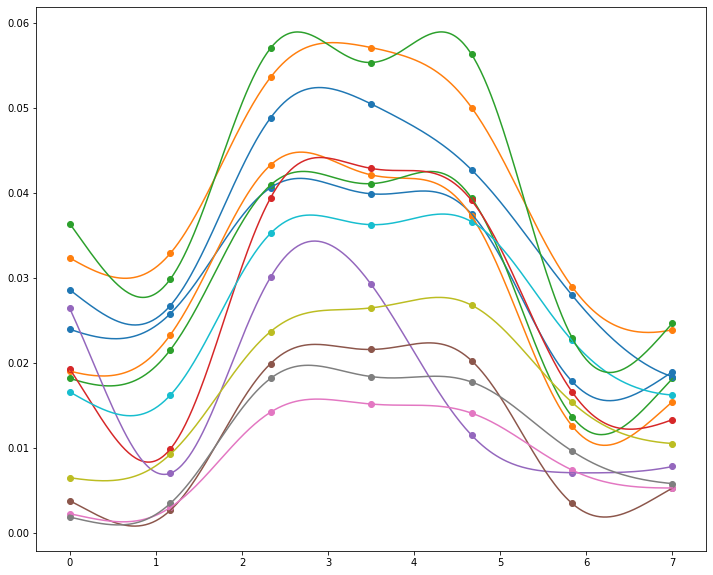

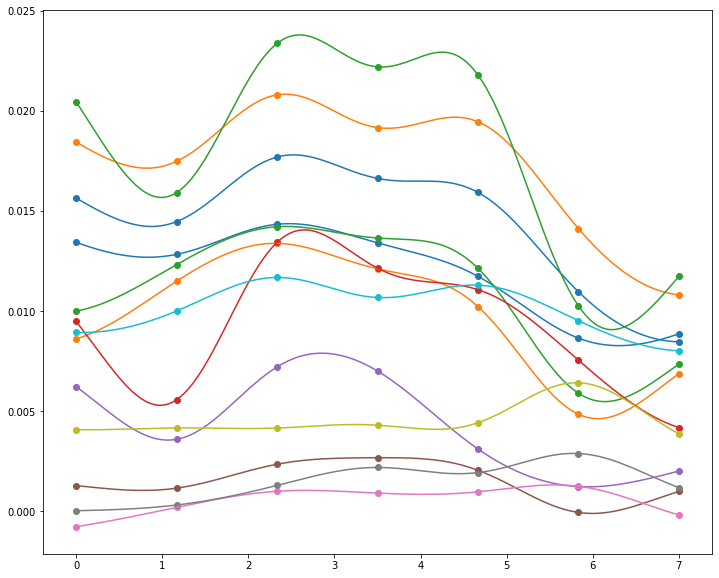

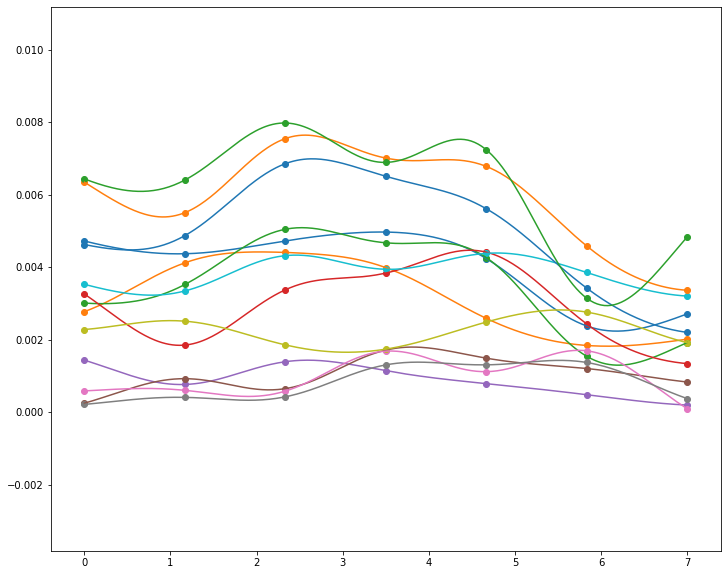

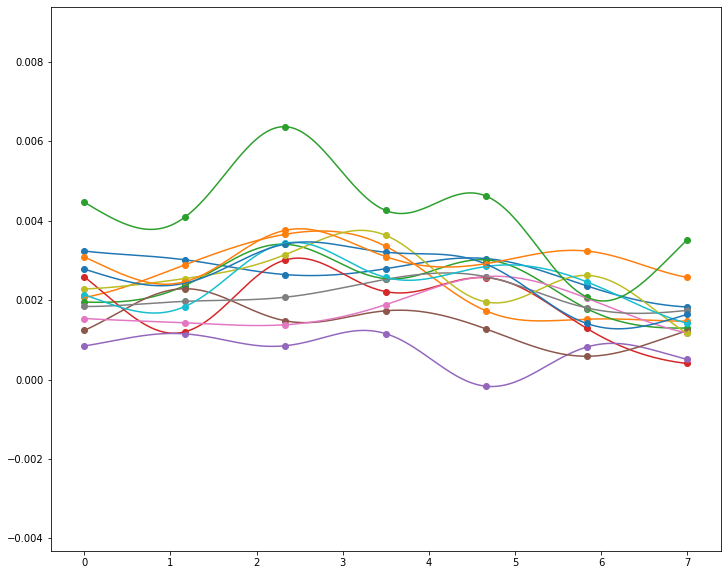

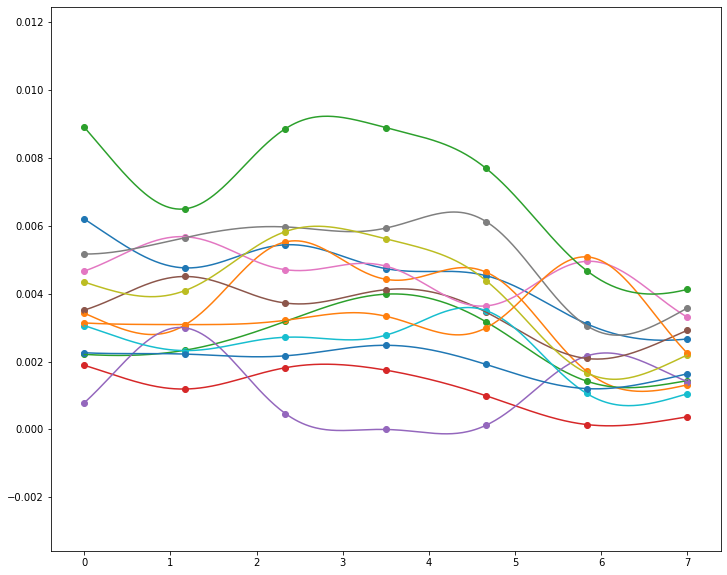

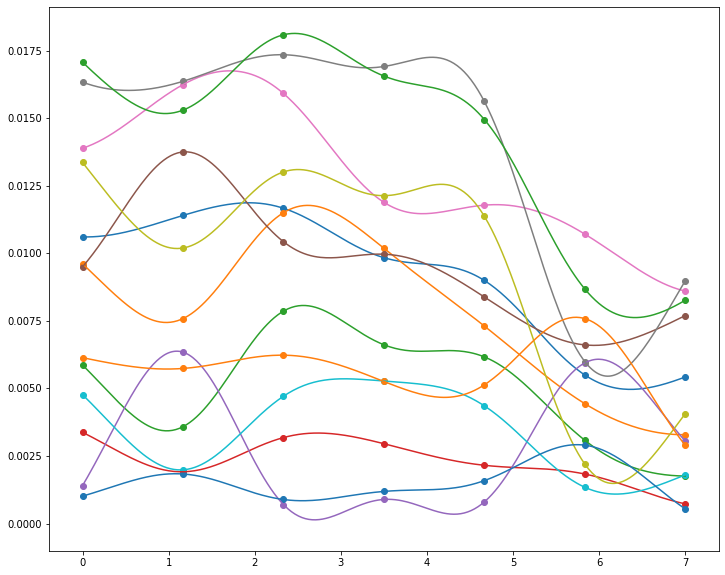

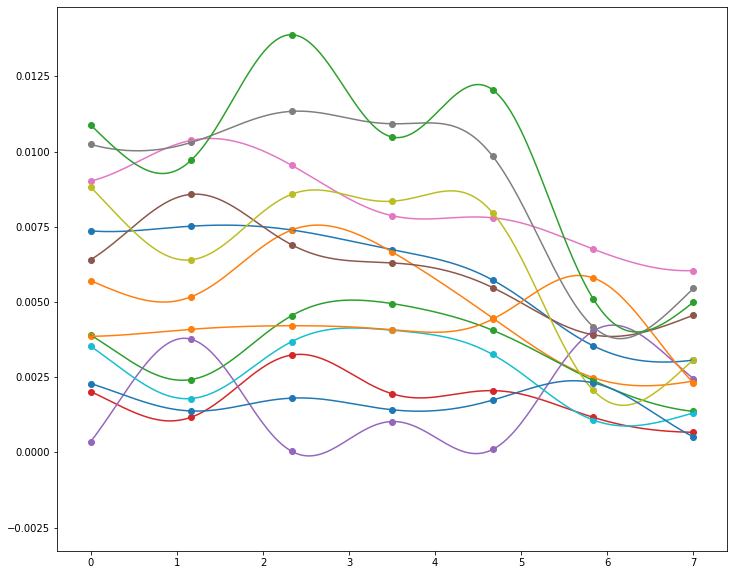

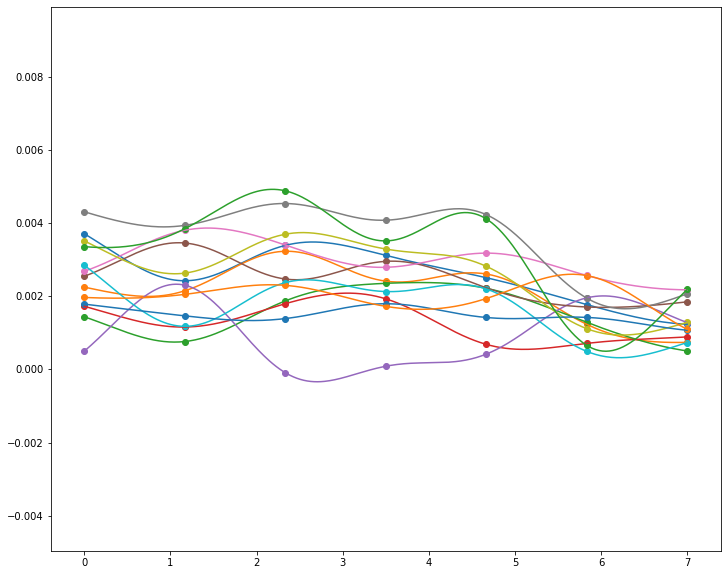

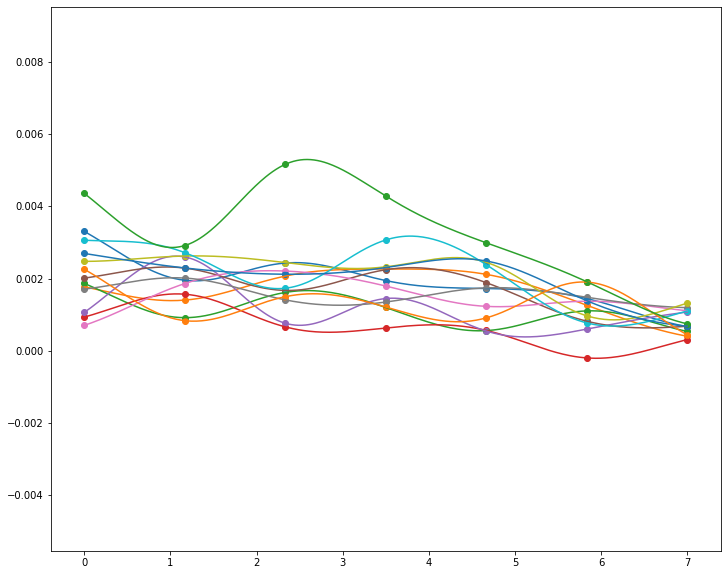

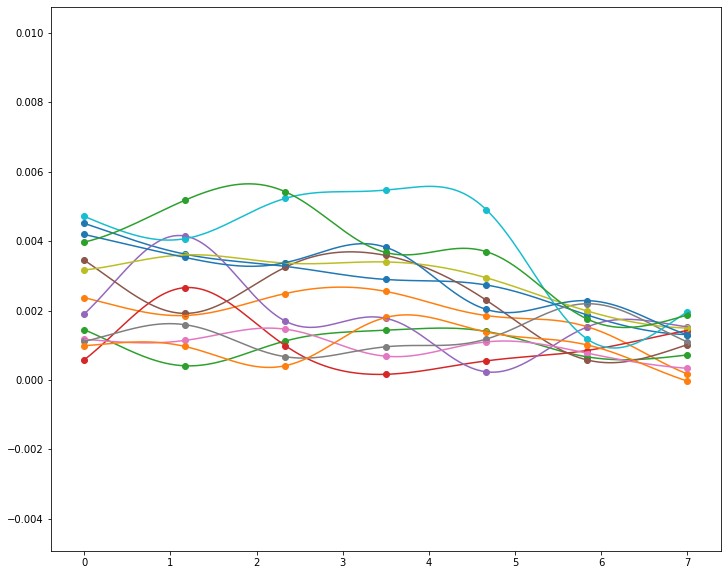

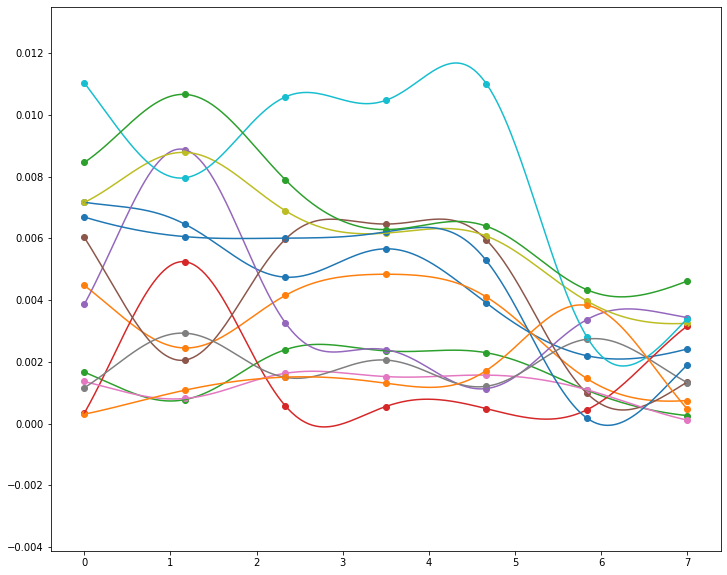

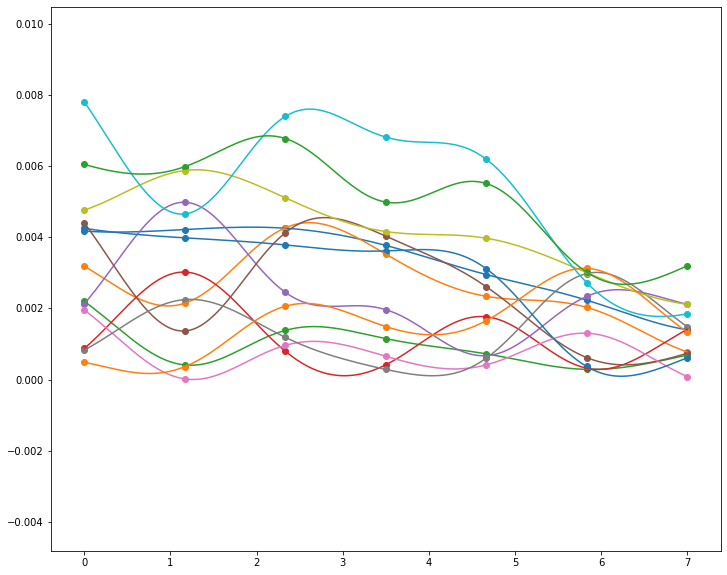

In [9]:
pos=np.linspace(0,7,7)
R,C=finaldf.shape
#display(finaldf1)
new={}
Num=350
for j in range(1,round(R/7)):
    subnew={}
    fig= plt.figure(figsize=(12,10))
    axes=fig.add_subplot(1,1,1)
    plt.legend(['1','2','3','4','5','6','7','8','9','10','11','12','13,'])
    for i in range(1,C):
        qq=finaldf.iloc[:,i-1:i][(j-1)*7:j*7].values
        #display(finaldf.iloc[:,i-1:i][:7])
        #plt.scatter(pos,qq)
        #display(len(pos),len(qq))
        f = Rbf(pos,qq,kind=typ)
        xnew=np.linspace(0,7,Num)
        dx=np.ara
        plt.scatter(pos,qq),plt.plot(xnew,f(xnew))
        '''RGB=[]
        for number in f(xnew):
            value=(xa-number)/(xa-xi)
            RGB.append([value*255,0,0])
        subnew['{}'.format(i)]=RGB
        df=DataFrame(subnew)
    r=df.values.tolist()
    im = np.array(r, dtype=np.uint8)
    plt.imshow(im)
    plt.axis('off')
    plt.title('EEL={}'.format(xzs[j]))
    %time plt.savefig('EEL={}.png'.format(xzs[j-1]),bbox_inches='tight',dpi=800)'''
'''df=DataFrame(new)
display(df)
df.to_csv('ghghg.csv')'''

In [139]:
import cv2
import numpy as np
import glob
R,C=finaldf1.shape
img_array = []
font= cv2.FONT_HERSHEY_SIMPLEX 
for i in range(1,round(R/7)+1):
    for filename in glob.glob('AASecEEL={}.png'.format(xzs[i-1])):
        print(xzs[i-1])
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)
out = cv2.VideoWriter('AAMilestone2.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)
display(len(img_array))
for j in range(len(img_array)):
    out.write(img_array[j])
out.release()

0.1
0.10526315789473685
0.1105263157894737
0.11578947368421053
0.12105263157894737
0.12631578947368421
0.13157894736842107
0.1368421052631579
0.14210526315789473
0.1473684210526316
0.15263157894736842
0.15789473684210525
0.1631578947368421
0.16842105263157897
0.17368421052631577
0.17894736842105263
0.1842105263157895
0.18947368421052632
0.19473684210526315
0.2


20

In [5]:
finaldf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
EEL=0.135_line_AlA,0.025696,0.018530,0.017111,0.019474,0.020557,0.004721,0.002250,0.001510,0.007673,0.015242,0.028312,0.033187,0.036395,0.024484
EEL=0.135_line_AlB,0.024273,0.023656,0.020699,0.010031,0.008336,0.003317,0.003667,0.002913,0.009593,0.015619,0.024709,0.032100,0.030260,0.027337
EEL=0.135_line_SiO2A,0.038506,0.039734,0.036295,0.035147,0.024476,0.015059,0.011741,0.014376,0.018874,0.031449,0.044747,0.046583,0.054153,0.039107
EEL=0.135_line_SiO2B,0.039427,0.039440,0.039121,0.036537,0.026293,0.018156,0.013264,0.015127,0.022389,0.031807,0.045916,0.050781,0.057872,0.040129
EEL=0.135_line_SiO2C,0.038037,0.039014,0.042024,0.037164,0.014655,0.018095,0.013946,0.016217,0.023901,0.033822,0.044998,0.049182,0.057631,0.038850
EEL=0.135_line_SiCA,0.023509,0.016509,0.020246,0.022087,0.009835,0.005995,0.009572,0.011435,0.017942,0.025787,0.031208,0.035873,0.027780,NaN
EEL=0.135_line_SiCB,0.023714,0.019155,0.022468,0.016447,0.010723,0.006768,0.008042,0.008337,0.013016,0.019189,0.021148,0.029149,0.029599,0.027707


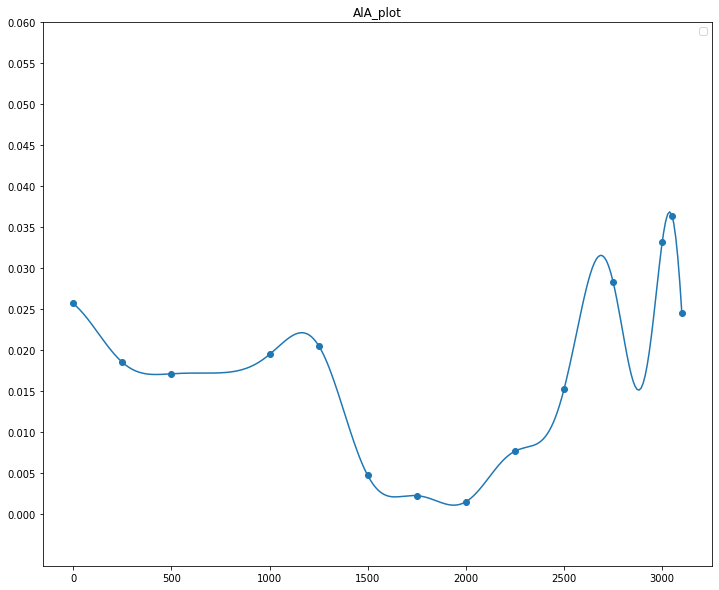

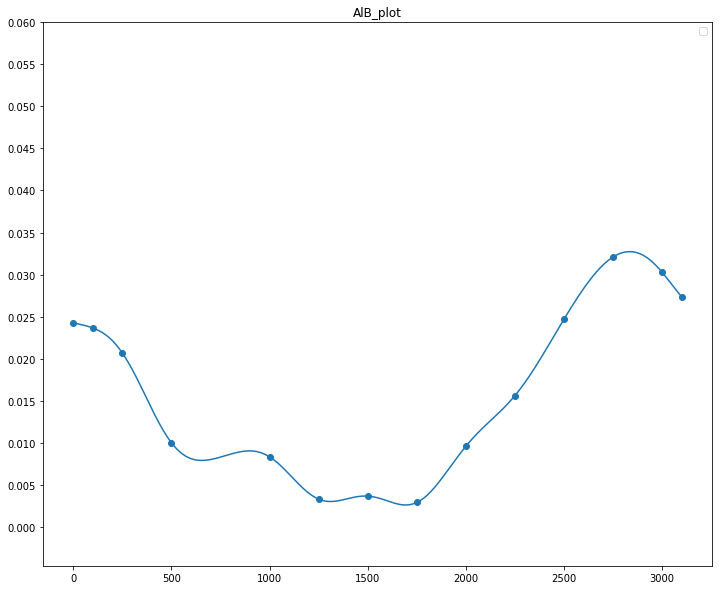

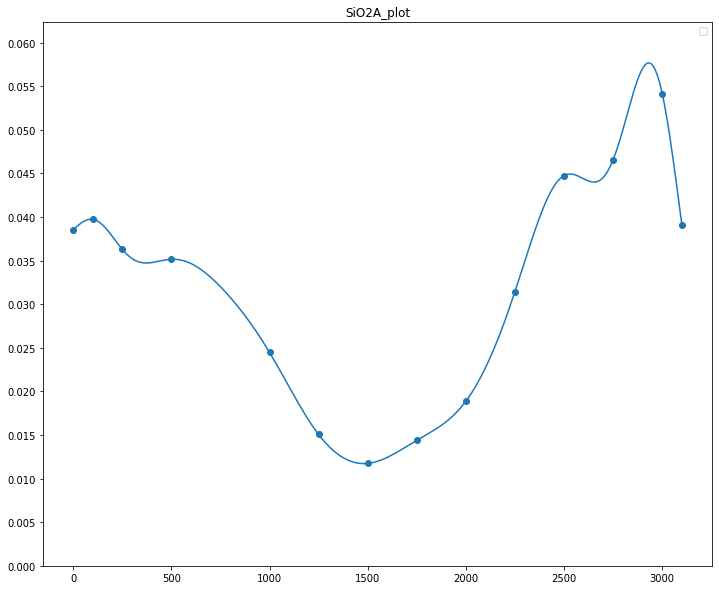

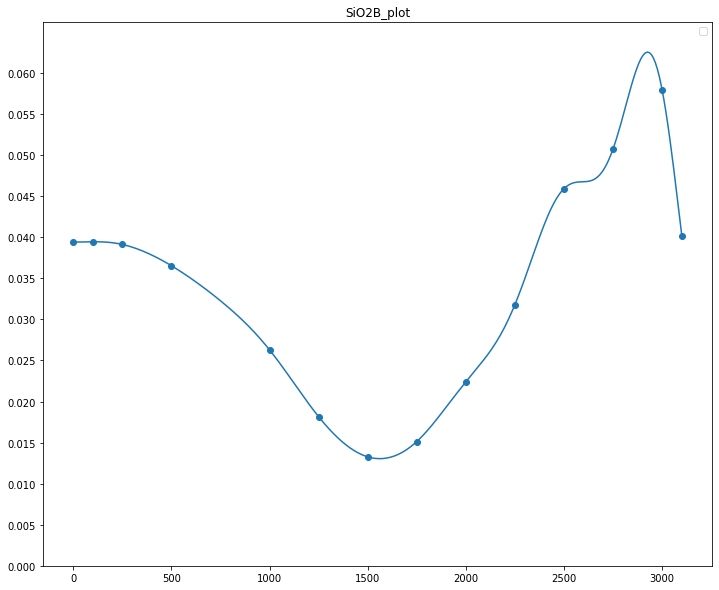

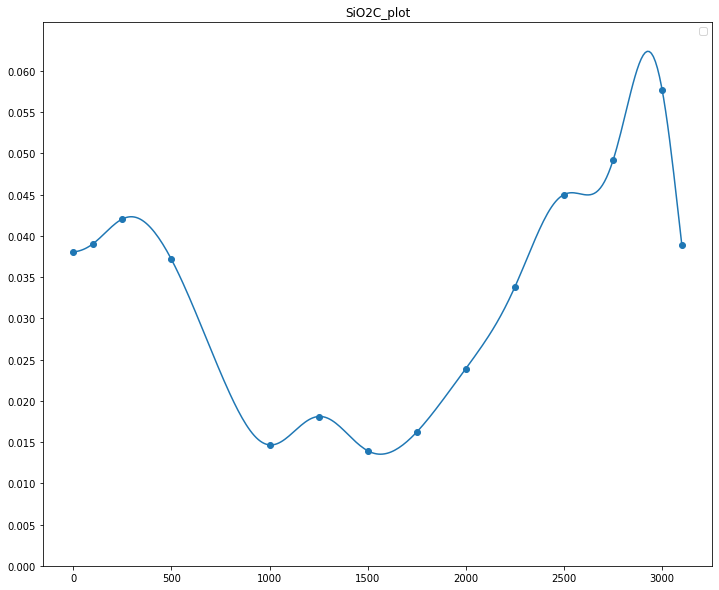

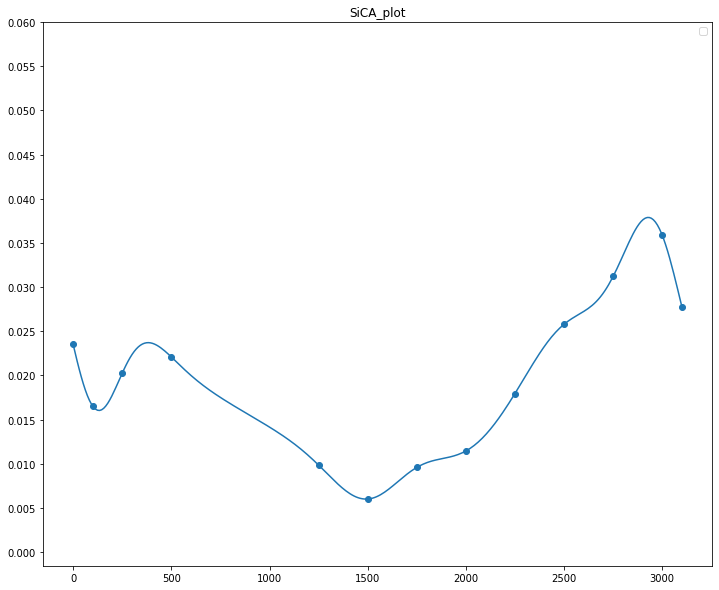

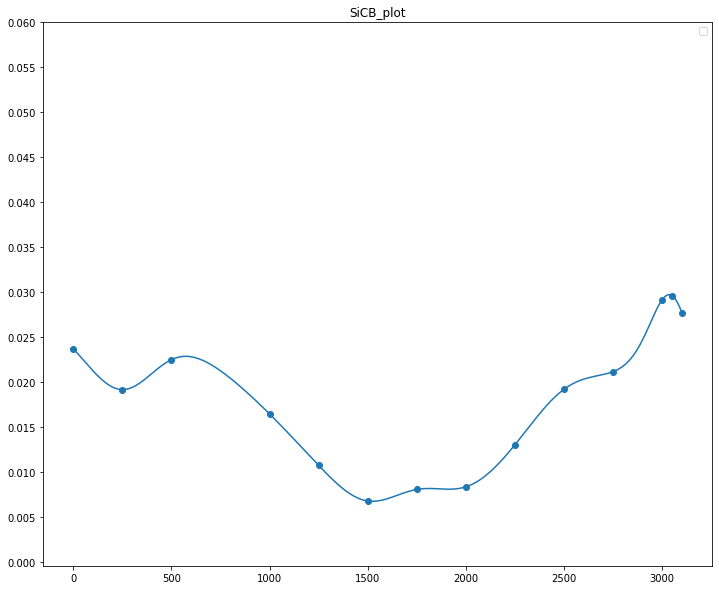

In [4]:
e,f=finaldf.shape
ttp='SiCB'
for kk in range(0,7):
    fig= plt.figure(figsize=(12,10))
    axes=fig.add_subplot(1,1,1)
    for jj in range(1,round(e/7)+1):
        z=finaldf.iloc[(jj-1)*7+kk:(jj-1)*7+kk+1].values
        z=z[np.logical_not(np.isnan(z))]
        q=finaldf1.iloc[(jj-1)*7+kk:(jj-1)*7+kk+1].values[0]
        q=q[np.logical_not(np.isnan(q))]
        x1=np.linspace(0,3100,num)
        x=total[kk]
        #display(len(z),len(x))
        #print(type(z))
        plt.legend(['0.1', '0.135', '0.155', '0.295', '0.445', '0.5'])
        plt.scatter(x,z)
        plt.plot(x1,q)
        plt.yticks(np.arange(0,0.061,0.005))
        plt.title('{}_plot'.format(stelement[kk]))
        #print('{}_plot.png'.format(stelement[kk]))
        plt.savefig('Zqq{}_plot_{}.png'.format(stelement[kk],typ),dpi=500)

[0.02349089 0.02353824 0.02358168 0.02362125 0.02365699 0.02368895
 0.02371715 0.02374165 0.02376247 0.02377966 0.02379326 0.02380331
 0.02380985 0.02381291 0.02381254 0.02380878 0.02380166 0.02379122
 0.02377751 0.02376056 0.02374042 0.02371712 0.0236907  0.0236612
 0.02362866 0.02359312 0.02355463 0.02351321 0.02346891 0.02342178
 0.02337183 0.02331913 0.0232637  0.02320559 0.02314484 0.02308148
 0.02301556 0.02294711 0.02287617 0.02280279 0.022727   0.02264885
 0.02256836 0.02248559 0.02240057 0.02231333 0.02222393 0.0221324
 0.02203878 0.0219431  0.02184541 0.02174575 0.02164416 0.02154067
 0.02143533 0.02132817 0.02121924 0.02110857 0.0209962  0.02088218
 0.02076655 0.02064933 0.02053057 0.02041032 0.02028861 0.02016547
 0.02004096 0.01991511 0.01978795 0.01965953 0.01952989 0.01939907
 0.0192671  0.01913403 0.0189999  0.01886474 0.01872859 0.0185915
 0.0184535  0.01831463 0.01817494 0.01803446 0.01789323 0.01775129
 0.01760868 0.01746544 0.01732161 0.01717723 0.01703234 0.0168869

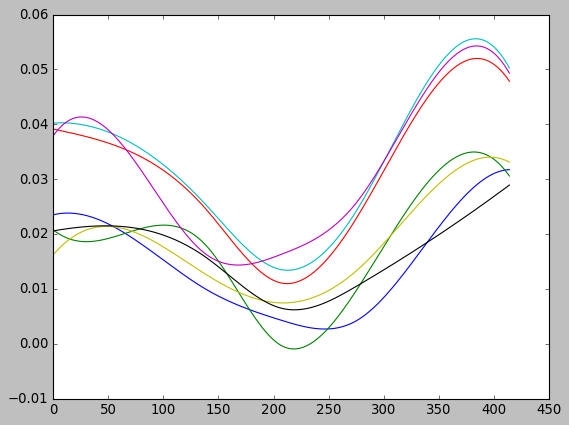

In [97]:
Df3=df3.transpose().drop([2,8]).transpose()
Finaldf1
for i in range(1,Finaldf1.shape[0]+1):
    val=Finaldf1.iloc[i-1:i].values[0]
    print(val)
    plt.plot(val)

In [66]:
Finaldf1

,0,1,2,3,4,5,6,7,8,9,...,405,406,407,408,409,410,411,412,413,414
L_1,0.023491,0.023538,0.023582,0.023621,0.023657,0.023689,0.023717,0.023742,0.023762,0.023780,...,0.031413,0.031472,0.031525,0.031573,0.031614,0.031648,0.031676,0.031698,0.031713,0.031721
L_2,0.020774,0.020618,0.020468,0.020325,0.020189,0.020059,0.019935,0.019818,0.019707,0.019602,...,0.032747,0.032544,0.032332,0.032110,0.031879,0.031637,0.031385,0.031124,0.030852,0.030570
L_3,0.039139,0.039096,0.039052,0.039009,0.038965,0.038922,0.038878,0.038835,0.038791,0.038747,...,0.050064,0.049861,0.049648,0.049423,0.049188,0.048941,0.048684,0.048414,0.048134,0.047842
L_4,0.040212,0.040225,0.040236,0.040245,0.040252,0.040258,0.040261,0.040263,0.040263,0.040260,...,0.053023,0.052768,0.052501,0.052220,0.051926,0.051618,0.051297,0.050962,0.050613,0.050251
L_5,0.037873,0.038150,0.038414,0.038666,0.038905,0.039132,0.039347,0.039550,0.039742,0.039922,...,0.051942,0.051702,0.051449,0.051183,0.050904,0.050611,0.050306,0.049986,0.049654,0.049307
L_6,0.016180,0.016412,0.016637,0.016857,0.017072,0.017280,0.017482,0.017679,0.017870,0.018055,...,0.033802,0.033750,0.033691,0.033626,0.033555,0.033478,0.033394,0.033303,0.033206,0.033102
L_7,0.020562,0.020596,0.020630,0.020663,0.020696,0.020728,0.020760,0.020791,0.020822,0.020852,...,0.027583,0.027731,0.027878,0.028026,0.028174,0.028323,0.028471,0.028620,0.028769,0.028919
L_8,0.025285,0.025274,0.025262,0.025248,0.025231,0.025213,0.025193,0.025171,0.025147,0.025121,...,0.033053,0.033114,0.033169,0.033218,0.033260,0.033296,0.033326,0.033349,0.033366,0.033376
L_9,0.023080,0.022809,0.022548,0.022298,0.022059,0.021830,0.021612,0.021403,0.021205,0.021016,...,0.036294,0.036155,0.036008,0.035853,0.035689,0.035517,0.035336,0.035146,0.034947,0.034740
L_10,0.041850,0.041840,0.041830,0.041819,0.041806,0.041793,0.041779,0.041765,0.041749,0.041732,...,0.056629,0.056406,0.056171,0.055924,0.055663,0.055390,0.055103,0.054803,0.054489,0.054162


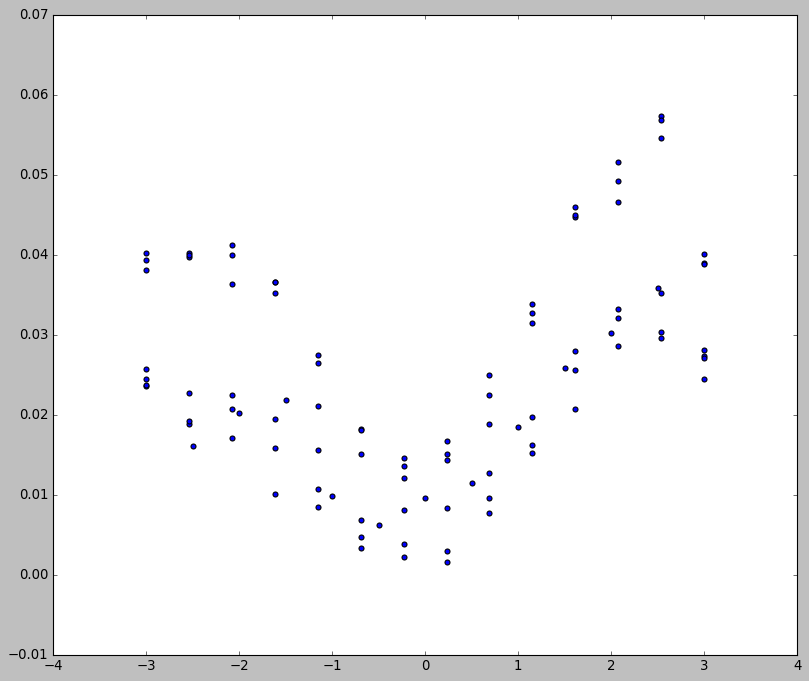

In [98]:
q,w=Df3.shape
FFF={}
for i in range (1,q+1):
    fig= plt.figure(figsize=(12,10))
    axes=fig.add_subplot(1,1,1)
    for k in range(1,w+1):
        gg=[]
        val=Df3.iloc[i-1:i,k-1:k].values[0][0]
        x=np.linspace(-3,3,len(val))
        plt.scatter(x,val)

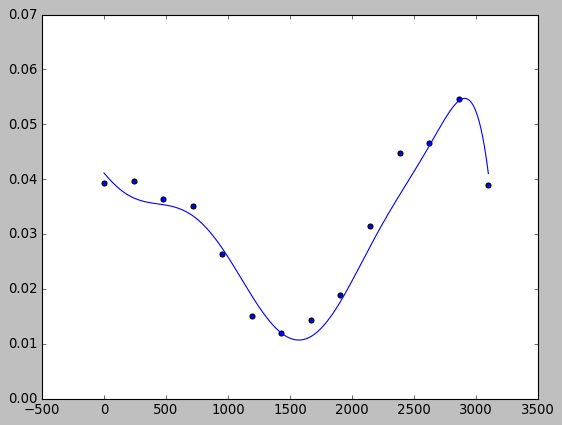

In [120]:
val=Finaldf1.iloc[2:3].values[0]
b=Df3.iloc[0:1,2:3].values[0][0]
x=np.linspace(0,3100,len(b))
plt.scatter(x,b)
x1=np.linspace(0,3100,len(val))
plt.plot(x1,val)

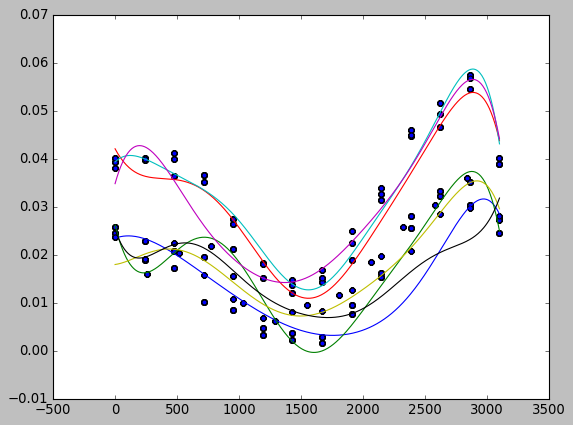

In [116]:
for i in range(1,Finaldf1.shape[0]+1):
    pp=[]
    '''fig= plt.figure(figsize=(12,10))
    axes=fig.add_subplot(1,1,1)'''
    for j in range(1,Df3.shape[1]+1):
        pp.append(Df3.iloc[int((i-1)/7):int((i)/7)+1,j-1:j].values[0][0])
        for k in pp:
            x=np.linspace(0,3100,len(k))
            plt.scatter(x,k)
    val=Finaldf1.iloc[i-1:i].values[0]
    x1=np.linspace(0,3100,len(val))

    plt.plot(x1,val)
plt.savefig('Total.png')

In [87]:
int(6/7)

0